In [71]:
#import required libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

In [72]:
#Loading the data
Weather_data_df = pd.read_csv('Weather_Data.csv')
Weather_data_df

,Date,Maximum_temp,Mean_temp,Minimum_temp,cloud_cover,sunshine,global_radiation,snow_depth,Pressure,Precipitation
0,20000101,10.8,7.0,4.9,7.0,0.4,18.0,0.0,102450.0,0.0
1,20000102,11.5,7.9,5.0,7.0,0.7,20.0,0.0,102530.0,0.2
2,20000103,9.5,9.4,7.2,8.0,0.0,13.0,0.0,101860.0,6.0
3,20000104,11.0,7.0,4.4,5.0,2.9,34.0,0.0,101480.0,0.2
4,20000105,10.8,6.4,1.9,5.0,1.3,25.0,0.0,101420.0,0.8
...,...,...,...,...,...,...,...,...,...,...
7666,20201227,7.5,7.5,7.6,1.0,0.9,32.0,NaN,98000.0,2.0
7667,20201228,3.6,1.1,-1.3,7.0,3.7,38.0,NaN,97370.0,0.2
7668,20201229,4.1,2.6,1.1,7.0,0.0,21.0,NaN,98830.0,0.0
7669,20201230,5.6,2.7,-0.1,6.0,0.4,22.0,NaN,100200.0,0.0


In [73]:
#changing the datatype of date
Weather_data_df['Date'] = pd.to_datetime(Weather_data_df['Date'], format='%Y%m%d')

In [74]:
#understanding the data
Weather_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7671 non-null   datetime64[ns]
 1   Maximum_temp      7665 non-null   float64       
 2   Mean_temp         7635 non-null   float64       
 3   Minimum_temp      7669 non-null   float64       
 4   cloud_cover       7666 non-null   float64       
 5   sunshine          7671 non-null   float64       
 6   global_radiation  7665 non-null   float64       
 7   snow_depth        6230 non-null   float64       
 8   Pressure          7668 non-null   float64       
 9   Precipitation     7665 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 599.4 KB


In [75]:
#understanding the data
Weather_data_df.describe()

,Maximum_temp,Mean_temp,Minimum_temp,cloud_cover,sunshine,global_radiation,snow_depth,Pressure,Precipitation
count,7665.000000,7635.000000,7669.000000,7666.000000,7671.000000,7665.000000,6230.000000,7668.000000,7665.000000
mean,15.811376,11.908265,7.996740,5.057657,4.334311,118.696282,0.022472,101516.459311,1.733568
std,6.522924,5.671964,5.244784,2.214302,3.994596,88.493215,0.301133,1046.506892,3.694844
min,-1.200000,-4.100000,-9.400000,0.000000,0.000000,8.000000,0.000000,97150.000000,0.000000
25%,10.800000,7.600000,4.100000,4.000000,0.500000,41.000000,0.000000,100910.000000,0.000000
50%,15.500000,11.800000,8.200000,5.000000,3.500000,95.000000,0.000000,101610.000000,0.000000
75%,20.700000,16.400000,12.100000,7.000000,7.100000,186.000000,0.000000,102210.000000,1.800000
max,37.900000,29.000000,22.300000,9.000000,16.000000,402.000000,12.000000,104820.000000,51.600000


In [76]:
#Checking null values
Weather_data_df.isna().sum()

Date                   0
Maximum_temp           6
Mean_temp             36
Minimum_temp           2
cloud_cover            5
sunshine               0
global_radiation       6
snow_depth          1441
Pressure               3
Precipitation          6
dtype: int64

# Cloud cover Plots

In [77]:
#Filled cloud cover null values
Weather_data_df['cloud_cover'].fillna(method='ffill', inplace=True)

In [78]:
Weather_data_df['cloud_cover'].unique()

array([7., 8., 5., 6., 4., 0., 3., 2., 1., 9.])

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



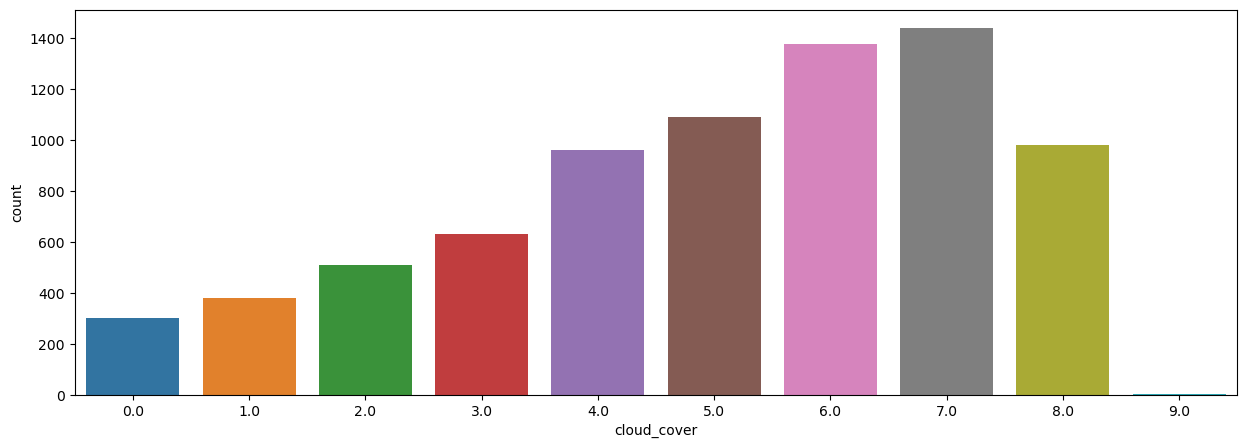

In [79]:
#Plotting the cloud cover plots
fig = plt.figure(figsize=(15,5))
fig = sns.countplot(Weather_data_df.cloud_cover)

In [80]:
#Plotting the cloud cover plots
clouds_status = dict()
clouds_status['Barely cloudy'] = Weather_data_df['cloud_cover'][Weather_data_df['cloud_cover'].isin([0,1,2])].count()
clouds_status['Partly cloudy'] = Weather_data_df['cloud_cover'][Weather_data_df['cloud_cover'].isin([3,4,5])].count()
clouds_status['Mostly cloudy'] = Weather_data_df['cloud_cover'][Weather_data_df['cloud_cover'].isin([6,7,8])].count()
clouds_status['Obstructed view'] = Weather_data_df['cloud_cover'][Weather_data_df['cloud_cover'] == 9].count()

In [81]:
#import required libraries
import plotly.express as px
import plotly.graph_objects as go
import calendar

In [82]:
fig = px.pie(values=list(clouds_status.values()), names=list(clouds_status.keys()), 
             title = "Cloud Cover Status(2000-2020)",)
fig.update_layout(width = 700, legend_title_text = 'Cloud status', font = dict(size = 14))
fig.show()

# Snow Depth Plots

In [83]:
#Filled null values
Weather_data_df['snow_depth'] = Weather_data_df.snow_depth.fillna(0)

In [84]:
Weather_data_df.isna().sum()

Date                 0
Maximum_temp         6
Mean_temp           36
Minimum_temp         2
cloud_cover          0
sunshine             0
global_radiation     6
snow_depth           0
Pressure             3
Precipitation        6
dtype: int64

In [85]:
#understanding the data
Weather_data_df

,Date,Maximum_temp,Mean_temp,Minimum_temp,cloud_cover,sunshine,global_radiation,snow_depth,Pressure,Precipitation
0,2000-01-01,10.8,7.0,4.9,7.0,0.4,18.0,0.0,102450.0,0.0
1,2000-01-02,11.5,7.9,5.0,7.0,0.7,20.0,0.0,102530.0,0.2
2,2000-01-03,9.5,9.4,7.2,8.0,0.0,13.0,0.0,101860.0,6.0
3,2000-01-04,11.0,7.0,4.4,5.0,2.9,34.0,0.0,101480.0,0.2
4,2000-01-05,10.8,6.4,1.9,5.0,1.3,25.0,0.0,101420.0,0.8
...,...,...,...,...,...,...,...,...,...,...
7666,2020-12-27,7.5,7.5,7.6,1.0,0.9,32.0,0.0,98000.0,2.0
7667,2020-12-28,3.6,1.1,-1.3,7.0,3.7,38.0,0.0,97370.0,0.2
7668,2020-12-29,4.1,2.6,1.1,7.0,0.0,21.0,0.0,98830.0,0.0
7669,2020-12-30,5.6,2.7,-0.1,6.0,0.4,22.0,0.0,100200.0,0.0


In [86]:
# Plotting the snow depth graphs
fig = px.scatter(Weather_data_df, x="Date", y="Mean_temp", color = 'snow_depth', color_continuous_scale=['lightblue', 'mediumblue'],
	         size="snow_depth", size_max=60, opacity = 0.6, title = "Snow depth")
fig.update_layout(height = 600, width = 1000, plot_bgcolor = 'white')
fig.update_xaxes(title = 'Date (2000-2020)', showgrid = False, linecolor = 'dimgrey', mirror = True)
fig.update_yaxes(title = 'Mean_temp', showgrid = False, zeroline = False, linecolor = 'dimgrey', mirror = True)
fig.update_coloraxes(colorbar = dict(title = 'snow_depth(cm)'))
fig.show()

# Precipitation level (mm)

In [87]:
fig = px.scatter(Weather_data_df, x="Date", y="Precipitation",    title = "Precipitation(in mm) vs date")
fig.update_layout(height = 600, width = 1000, plot_bgcolor = 'white')
fig.update_xaxes(title = 'Date (2000-2020)', showgrid = False, linecolor = 'dimgrey', mirror = True)
fig.update_yaxes(title = 'Precipitation', showgrid = False, zeroline = False, linecolor = 'dimgrey', mirror = True)
fig.update_coloraxes(colorbar = dict(title = 'Precipitation(in mm) vs date'))
fig.show()

 

In [88]:
fig = px.scatter(Weather_data_df, x="Mean_temp", y="Precipitation",    title = "Precipitation(in mm) vs mean temp")
fig.update_layout(height = 600, width = 1000, plot_bgcolor = 'white')
fig.update_xaxes(title = 'Mean_temp', showgrid = False, linecolor = 'dimgrey', mirror = True)
fig.update_yaxes(title = 'Precipitation', showgrid = False, zeroline = False, linecolor = 'dimgrey', mirror = True)
fig.update_coloraxes(colorbar = dict(title = 'Precipitation(in mm) vs mean temp'))
fig.show()